<a href="https://colab.research.google.com/github/drskprabhakar/Axial-Length-Prediction-ML-Regression-mode/blob/main/DR_VGG16_good_prediction_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import numpy as np
os.listdir('/content/drive/MyDrive/DR fundus images/split')

['train', 'val', 'test']

In [2]:
os.listdir('/content/drive/MyDrive/DR fundus images/split/train')

['DR2', 'DR3', 'DR1']

In [69]:
from keras.preprocessing.image import ImageDataGenerator
datagenaug = ImageDataGenerator(rotation_range=20,
                             width_shift_range= 0.2,
                             height_shift_range= 0.2,
                             brightness_range= None,
                             shear_range= 0.2,
                             zoom_range=0.2,
                             channel_shift_range= 0.2,
                             fill_mode= "nearest",

                             horizontal_flip=0.2,
                             vertical_flip=0.2,
                             rescale=1/255)
datagen = ImageDataGenerator()

trainimages = datagen.flow_from_directory('/content/drive/MyDrive/DR fundus images/split/train',
                                          target_size=(224,224),
                                          class_mode='categorical')

valimages = datagen.flow_from_directory('/content/drive/MyDrive/DR fundus images/split/val',
                                        target_size=(224,224),
                                        class_mode='categorical')

testimages = datagen.flow_from_directory('/content/drive/MyDrive/DR fundus images/split/test',
                                         target_size=(224,224),
                                         class_mode='categorical')


Found 78 images belonging to 3 classes.
Found 14 images belonging to 3 classes.
Found 14 images belonging to 3 classes.


In [70]:
import keras
VGG = keras.applications.VGG16(include_top=False,
                               weights="imagenet",
                               input_shape=(224,224,3))
VGG.trainable=False

In [71]:
from keras.models import Sequential
model = keras.Sequential([
    VGG,
    keras.layers.Flatten(),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(3, activation='softmax')
])
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten_3 (Flatten)         (None, 25088)             0         
                                                                 
 dense_9 (Dense)             (None, 256)               6422784   
                                                                 
 dense_10 (Dense)            (None, 256)               65792     
                                                                 
 dense_11 (Dense)            (None, 3)                 771       
                                                                 
Total params: 21204035 (80.89 MB)
Trainable params: 6489347 (24.75 MB)
Non-trainable params: 14714688 (56.13 MB)
_________________________________________________________________


In [76]:
model.fit(trainimages,
          batch_size=32,
          epochs=20,
          validation_data=valimages)
model.save('DRVGG16_model.keras')

Epoch 1/20
3/3 [==============================] - 6s 2s/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 6.1380 - val_accuracy: 0.5714
Epoch 2/20
3/3 [==============================] - 4s 2s/step - loss: 8.4027e-04 - accuracy: 1.0000 - val_loss: 6.2456 - val_accuracy: 0.6429
Epoch 3/20
3/3 [==============================] - 5s 2s/step - loss: 1.2327e-04 - accuracy: 1.0000 - val_loss: 6.3344 - val_accuracy: 0.6429
Epoch 4/20
3/3 [==============================] - 4s 1s/step - loss: 3.3048e-05 - accuracy: 1.0000 - val_loss: 6.3966 - val_accuracy: 0.7143
Epoch 5/20
3/3 [==============================] - 4s 2s/step - loss: 2.1831e-05 - accuracy: 1.0000 - val_loss: 6.4324 - val_accuracy: 0.7143
Epoch 6/20
3/3 [==============================] - 4s 1s/step - loss: 1.7331e-05 - accuracy: 1.0000 - val_loss: 6.4562 - val_accuracy: 0.7143
Epoch 7/20
3/3 [==============================] - 4s 2s/step - loss: 1.5661e-05 - accuracy: 1.0000 - val_loss: 6.4697 - val_accuracy: 0.7143
Epoch 8/20
3/3 [=

In [77]:
y_pred = model.predict(testimages)
y_pred

1/1 [==============================] - 1s 580ms/step


array([[9.99999881e-01, 1.89150697e-13, 1.02762115e-07],
       [1.98902972e-02, 1.11987375e-01, 8.68122339e-01],
       [1.75265358e-29, 6.41730395e-21, 1.00000000e+00],
       [1.37664697e-11, 1.00000000e+00, 3.48086941e-11],
       [1.92097332e-15, 1.77998647e-17, 1.00000000e+00],
       [2.73523749e-22, 1.00000000e+00, 2.23025135e-19],
       [1.69612031e-29, 1.16719903e-05, 9.99988317e-01],
       [3.67083485e-22, 1.00000000e+00, 3.03657342e-29],
       [7.56640275e-34, 1.00000000e+00, 2.80850003e-14],
       [2.21257419e-27, 5.90155147e-11, 1.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [1.94056400e-16, 1.00000000e+00, 2.03691261e-19],
       [2.47818167e-22, 3.08996005e-06, 9.99996901e-01],
       [1.00000000e+00, 1.10479888e-14, 1.39105527e-08]], dtype=float32)

In [78]:
y_pred1 = np.argmax(y_pred, axis=1)
y_pred1

array([0, 2, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 2, 0])

In [10]:
y_true = testimages.classes
y_true

array([0, 0, 0, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2], dtype=int32)

In [79]:
from sklearn import metrics
metrics.confusion_matrix(y_true, y_pred1)

array([[1, 0, 2],
       [0, 4, 2],
       [1, 1, 3]])

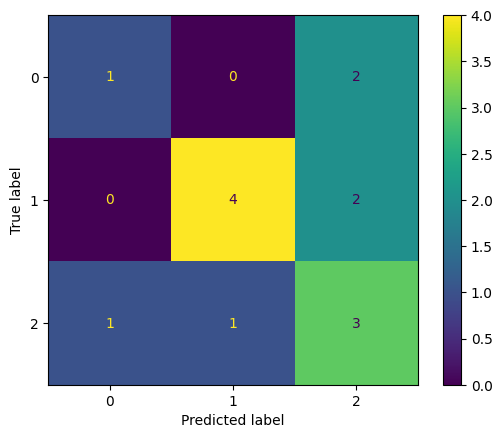

In [80]:
metrics.ConfusionMatrixDisplay.from_predictions(y_true, y_pred1)

In [81]:
print(metrics.classification_report(y_true,y_pred1,
                                    target_names=['DR1', 'DR2', 'DR3']))

              precision    recall  f1-score   support

         DR1       0.50      0.33      0.40         3
         DR2       0.80      0.67      0.73         6
         DR3       0.43      0.60      0.50         5

    accuracy                           0.57        14
   macro avg       0.58      0.53      0.54        14
weighted avg       0.60      0.57      0.58        14



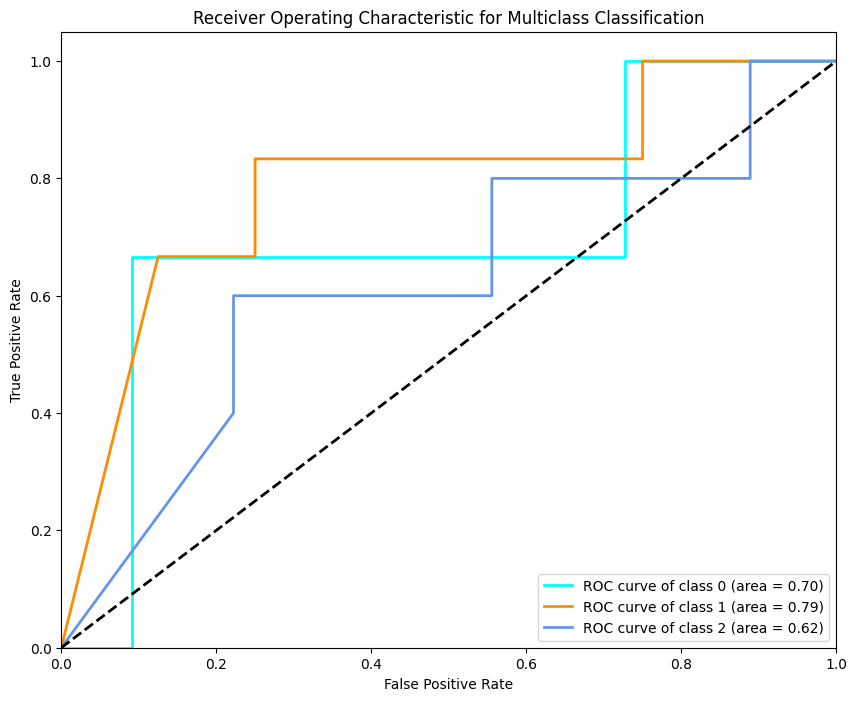

In [82]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import LabelBinarizer
from itertools import cycle

# Assuming you have your model predictions and ground truth labels
# model_predictions = Your model's predicted probabilities for each class
# ground_truth_labels = Ground truth labels for each sample

# Convert labels to one-hot encoding
label_binarizer = LabelBinarizer()
ground_truth_labels_binary = label_binarizer.fit_transform(y_true)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = len(label_binarizer.classes_)

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(ground_truth_labels_binary[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves
plt.figure(figsize=(10, 8))
colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(label_binarizer.classes_[i], roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Multiclass Classification')
plt.legend(loc="lower right")
plt.show()


In [83]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model

# Load the trained CNN model
model = load_model('/content/DRVGG16_model.keras')  # Provide the path to your trained model file

# Define a function to predict unknown images
def predict_unknown_image(image_path):
    img = image.load_img(image_path, target_size=(224,224))  # Assuming images are resized to 150x150
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Expand dimensions to match batch size
    img_array /= 255.0  # Normalize pixel values

    prediction = model.predict(img_array)
    predicted_class_index = np.argmax(prediction)  # Get the index of the class with the highest probability
    class_names = ["DR1", "DR2", "DR3"]  # Example class names, modify as per your multiclass classes
    predicted_class_name = class_names[predicted_class_index]

    return predicted_class_name

# Example usage:
unknown_image_path = "/content/drive/MyDrive/DR fundus images/split/test/DR3/1ffa92ed-8d87-11e8-9daf-6045cb817f5b..JPG"
# Provide the path to the unknown image
prediction = predict_unknown_image(unknown_image_path)
print("Prediction:", prediction)


1/1 [==============================] - 0s 135ms/step
Prediction: DR3
